In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f1c57a704205e40cbf44d5e9efb0836a51461b7d2d3babfc18fe4858b6069adc
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


Enter Glycaemia measurements: 100
Enter Difface measurements: 3
Recommended Proteinuria intake: 2625.0


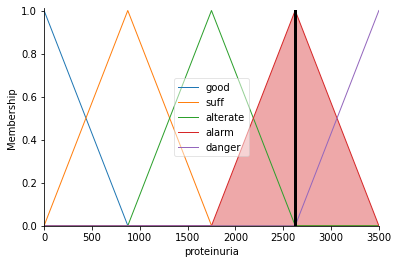

In [ ]:
#EXERCISE 5: Fuzzy logic–based clinical decision support system for the evaluation of renal function in post‐Transplant Patients

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Input variables
glycaemia   = ctrl.Antecedent(np.arange(50,151,1),'glycaemia')
diffACE     = ctrl.Antecedent(np.arange(0,16,1),'diffACE')

#Output variables
proteinuria = ctrl.Consequent(np.arange(0,3501,1),'proteinuria')

#Ranges for glycaemia and difface
glycaemia.automf(3, names=['good', 'alarm', 'danger'])

diffACE['0'] = fuzz.trimf(diffACE.universe, [0, 0, 1])
diffACE['1'] = fuzz.trimf(diffACE.universe, [0, 1, 2])
diffACE['2'] = fuzz.trimf(diffACE.universe, [2, 3, 3])
diffACE['3'] = fuzz.trimf(diffACE.universe, [3, 5, 9])
diffACE['4'] = fuzz.trapmf(diffACE.universe, [9, 12, 15, 15])

proteinuria.automf(5, names=['good', 'suff', 'alterate', 'alarm', 'danger'])

#Set Rules
rules = [ctrl.Rule(glycaemia['good'] & diffACE['0'], proteinuria['good']),
         ctrl.Rule(glycaemia['alarm'] & diffACE['0'], proteinuria['suff']),
         ctrl.Rule(glycaemia['danger'] & diffACE['0'], proteinuria['alterate']),
         ctrl.Rule(glycaemia['good'] & diffACE['1'], proteinuria['suff']),
         ctrl.Rule(glycaemia['alarm'] & diffACE['1'], proteinuria['alterate']),
         ctrl.Rule(glycaemia['danger'] & diffACE['1'], proteinuria['alarm']),
         ctrl.Rule(glycaemia['good'] & diffACE['2'], proteinuria['alterate']),
         ctrl.Rule(glycaemia['alarm'] & diffACE['2'], proteinuria['alarm']),
         ctrl.Rule(glycaemia['danger'] & diffACE['2'], proteinuria['danger']),
         ctrl.Rule(glycaemia['good'] & diffACE['3'], proteinuria['alarm']),
         ctrl.Rule(glycaemia['alarm'] & diffACE['3'], proteinuria['danger']),
         ctrl.Rule(glycaemia['danger'] & diffACE['3'], proteinuria['danger']),
         ctrl.Rule(glycaemia['good'] & diffACE['4'], proteinuria['danger']),
         ctrl.Rule(glycaemia['alarm'] & diffACE['4'], proteinuria['danger']),
         ctrl.Rule(glycaemia['danger'] & diffACE['4'], proteinuria['danger'])]

# Create control system and simulation
proteinuria_recommendation = ctrl.ControlSystem(rules)
recommendation = ctrl.ControlSystemSimulation(proteinuria_recommendation)

#Enter values
Glycaemia = float(input('Enter Glycaemia measurements: '))
Difface = float(input('Enter Difface measurements: '))

# Set input values
recommendation.input['glycaemia'] = Glycaemia
recommendation.input['diffACE'] = Difface

# Compute proteinuria recommendation
recommendation.compute()

# Print output result
print("Recommended Proteinuria intake:", round(recommendation.output['proteinuria'], 2))
proteinuria.view(sim = recommendation)